# Model training for Algerian Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
## drop day,month,year features

df.drop(["day","month","year"],axis=1,inplace=True)

In [5]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
## Converting categorical feature "Classes" into numerical feature

In [7]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [8]:
df["Classes"].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [9]:
## Spliting into Dependent and Independent 

X=df.drop(columns="FWI",axis=1)             ## Independent Features
y=df["FWI"]                                             ## Dependent Faetures

In [10]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
## Train-Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((182, 11), (61, 11), (182,), (61,))

## Feature Selection based on Correlation


In [16]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot: >

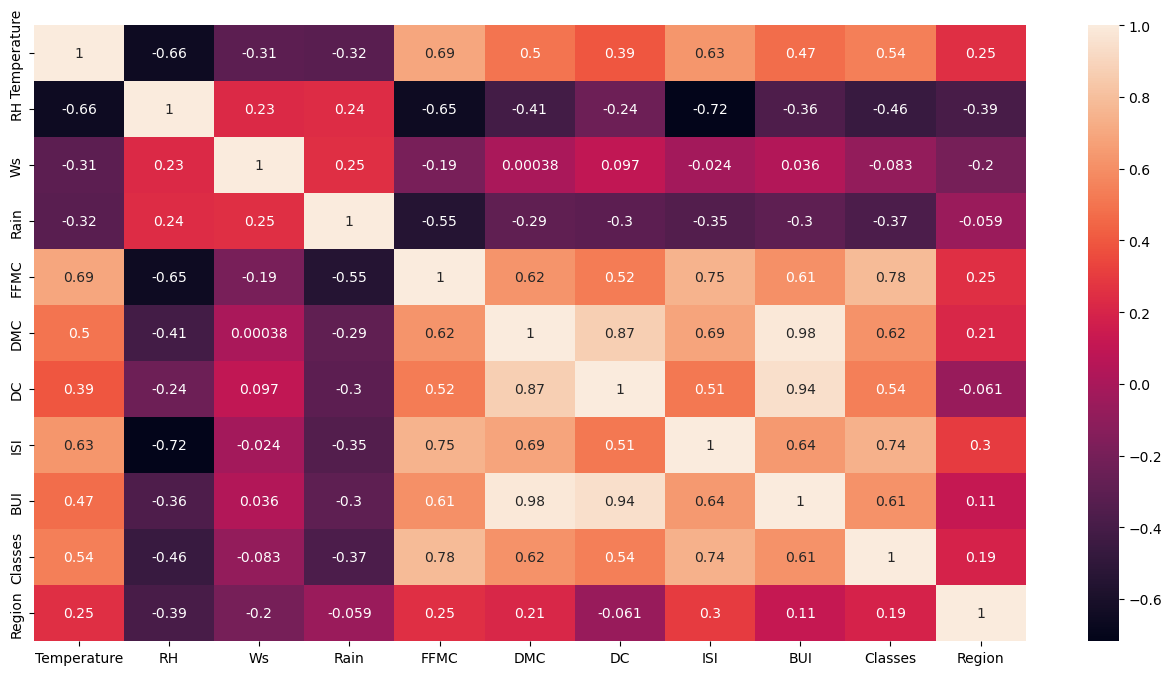

In [17]:
## Check for multi-colinearity
plt.figure(figsize=(16,8))
sns.heatmap(X_train.corr(),annot=True)

#### We will try to remove those features from our dataset whose value is greater than the threshold value because after that threshold value, features tends to behave almost similarly . Therefore , there is no need to consider similar features twice.

In [54]:
## creating function which takes dataset and threshold value and return us the features which are correlted more than the threshold value
def correlation(dataset,threshold):
    col_correlated=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_correlated.add(colname)
    return col_correlated          
                
        

In [19]:
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [20]:
## Removing those columns whose correlation is greater than 85%

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_test.shape

(61, 9)

## Feature scaling


In [56]:
## Stanadardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

/tmp/ipykernel_641/560834734.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train before scaled')

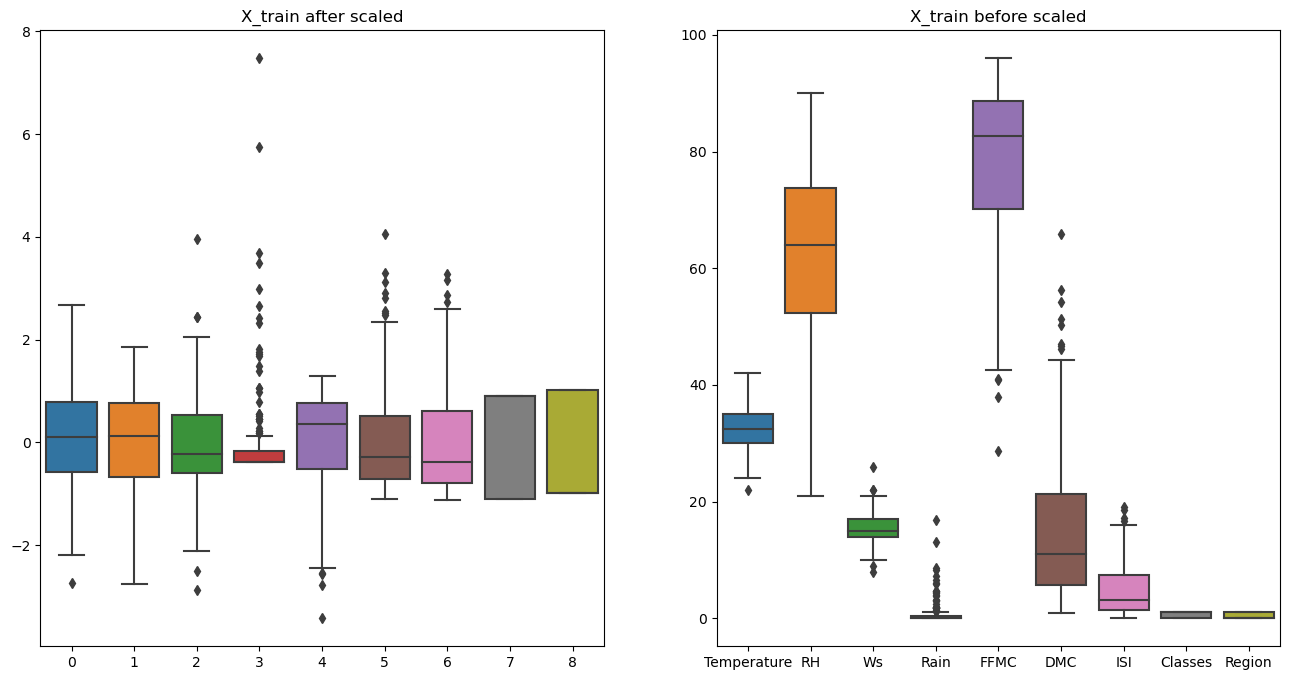

In [58]:
## plotting subplots

plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(X_train_scaled)
plt.title("X_train after scaled")
plt.subplot(1,2,2)
sns.boxplot(X_train)
plt.title("X_train before scaled")

## Linear Regression

Error 0.5468236465249985
Score 0.9847657384266951


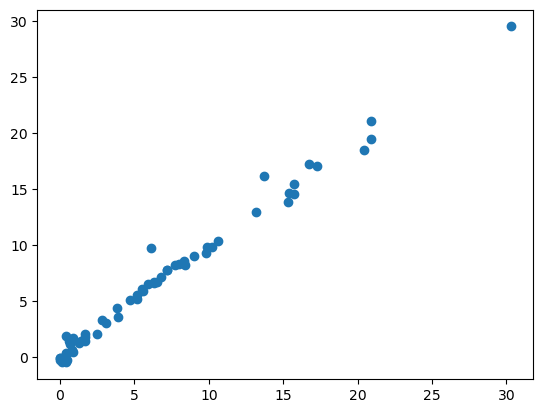

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Error",mae)
print("Score",score)
plt.scatter(y_test,y_pred)

## Lasso Regression



Error 1.133175994914409
Score 0.9492020263112388


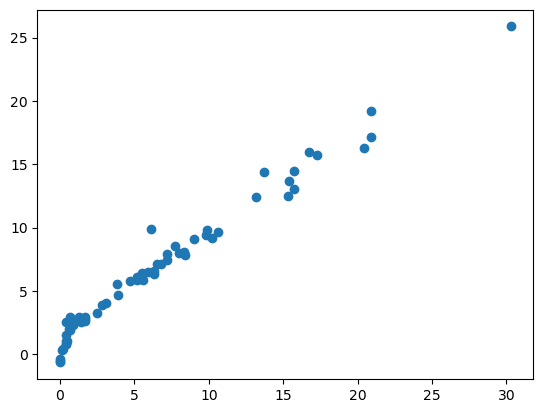

In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Error",mae)
print("Score",score)
plt.scatter(y_test,y_pred)

## Cross Validation for lasso

Error 0.6199701158263433
Score 0.9820946715928275


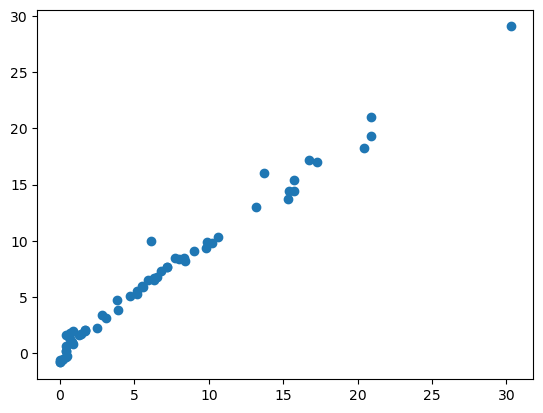

In [63]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Error",mae)
print("Score",score)
plt.scatter(y_test,y_pred)

## Ridge Regression

Error 0.5642305340105692
Score 0.9842993364555513


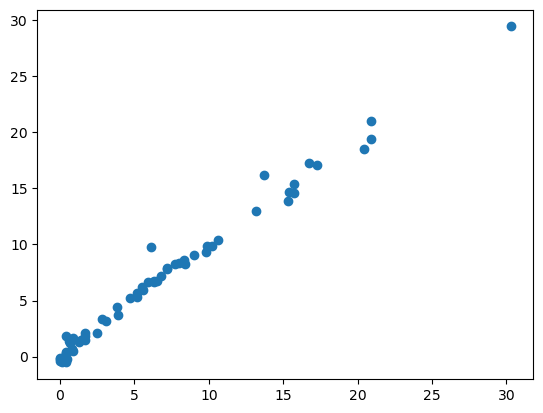

In [65]:
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Error",mae)
print("Score",score)
plt.scatter(y_test,y_pred)

## Cross validation for Ridge

Error 0.5642305340105692
Score 0.9842993364555513


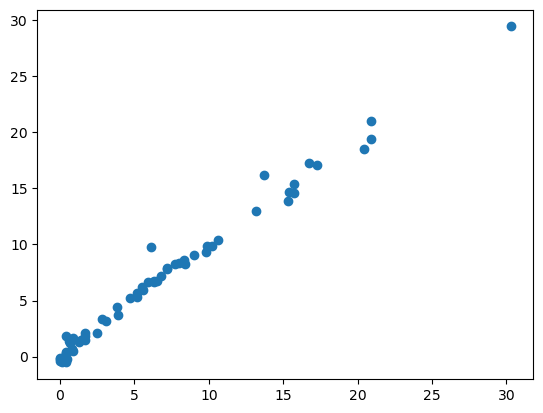

In [35]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Error",mae)
print("Score",score)
plt.scatter(y_test,y_pred)

In [67]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## ElasticNet Regression

Error 1.8822353634896005
Score 0.8753460589519703


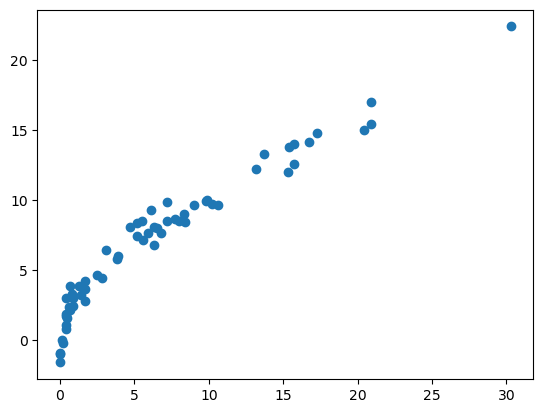

In [68]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Error",mae)
print("Score",score)
plt.scatter(y_test,y_pred)

## Cross validation for elasticnet

Error 0.6575946731430898
Score 0.9814217587854941


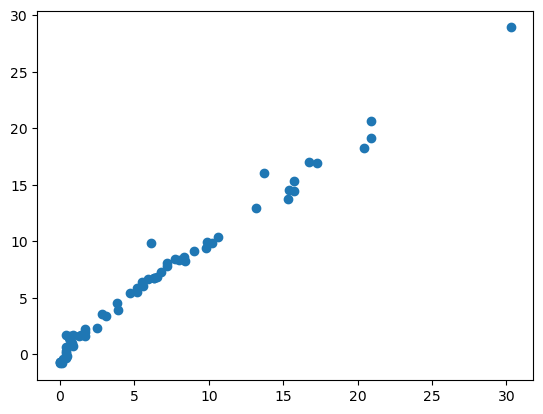

In [42]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Error",mae)
print("Score",score)
plt.scatter(y_test,y_pred)

In [46]:
elasticnetcv.alphas_

array([1.41170600e+01, 1.31656174e+01, 1.22782989e+01, 1.14507826e+01,
       1.06790382e+01, 9.95930678e+00, 9.28808283e+00, 8.66209714e+00,
       8.07830078e+00, 7.53385034e+00, 7.02609405e+00, 6.55255882e+00,
       6.11093829e+00, 5.69908150e+00, 5.31498248e+00, 4.95677045e+00,
       4.62270071e+00, 4.31114616e+00, 4.02058933e+00, 3.74961507e+00,
       3.49690356e+00, 3.26122397e+00, 3.04142839e+00, 2.83644629e+00,
       2.64527931e+00, 2.46699633e+00, 2.30072904e+00, 2.14566760e+00,
       2.00105679e+00, 1.86619226e+00, 1.74041714e+00, 1.62311885e+00,
       1.51372607e+00, 1.41170600e+00, 1.31656174e+00, 1.22782989e+00,
       1.14507826e+00, 1.06790382e+00, 9.95930678e-01, 9.28808283e-01,
       8.66209714e-01, 8.07830078e-01, 7.53385034e-01, 7.02609405e-01,
       6.55255882e-01, 6.11093829e-01, 5.69908150e-01, 5.31498248e-01,
       4.95677045e-01, 4.62270071e-01, 4.31114616e-01, 4.02058933e-01,
       3.74961507e-01, 3.49690356e-01, 3.26122397e-01, 3.04142839e-01,
      

## Pickle the Machine learning model, preprocessing standardscaler

In [48]:
scaler

StandardScaler()

In [50]:
ridge

Ridge()

In [53]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))